<a href="https://colab.research.google.com/github/Kropotikin/Introduction_to_Machine_Learning_with_Python/blob/main/Cap4_Represent_dados_feature_engeneering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[GitHub](https://github.com/Kropotikin/introduction_to_ml_with_python/blob/master/04-representing-data-feature-engineering.ipynb)

#<h1 align = 'right'><font size = +3.5><b>Preparando ambiente</b></font></h1>
---

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 9.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=9c03c9ac603c85a14048da0e3550a9527ed45bd4b213edf2d37e39a2dec90b46
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import sys
print(f"Python version: {sys.version}")
import pandas as pd
print(f"Pandas version: {pd.__version__}")
import numpy as np
print(f"Numpy version: {np.__version__}")
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")
import matplotlib.pyplot as plt
import mglearn
print(f"Mglearn version: {mglearn.__version__}")
import scipy as sp
print(f"Scipy version: {sp.__version__}")
import sklearn
print(f"Sklearn version: {sklearn.__version__}")

Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Pandas version: 1.3.5
Numpy version: 1.21.6
Matplotlib version: 3.2.2
Mglearn version: 0.1.9
Scipy version: 1.4.1
Sklearn version: 1.0.2


In [3]:
# desativar avisos
import warnings
warnings.filterwarnings('ignore')

In [4]:
# habilitar a plotagem no notebook
%matplotlib inline
#from preamble import *
plt.rcParams['image.cmap'] = "gray"

In [5]:
# retira notação científica
pd.options.display.float_format = '{:.4f}'.format

#<h1 align = 'right'><font size = +3.5><b>Representação de dados e Engenharia de Recursos</b></font></h1>
---

Até agora, assumimos que nossos dados vêm como uma matriz bidimensional de números de ponto flutuante, onde cada coluna é um recurso contínuo que descreve os pontos de dados. Para muitos aplicações, não é assim que os dados são coletados. Um tipo de recurso particularmente comum são os recursos categóricos. Também conhecidos como recursos discretos,
estes geralmente não são numéricos. A distinção entre características categóricas e características contínuas é análoga à distinção entre classificação e regressão, apenas no lado da entrada e não no lado da saída. Exemplos de recursos contínuos que vimos são brilhos de pixel e medidas de tamanho de flores de plantas. Exemplos de características categóricas são a marca de um produto, a cor de um produto ou o departamento (livros, roupas, hardware) em que é vendido. Todas essas são propriedades que podem descrever um produto, mas não variam em um maneira contínua. Um produto pertence ao departamento de roupas ou ao departamento de livros. Não há meio solo entre livros e roupas, e nenhuma ordem natural para as diferentes categorias (livros não é maior ou menor que roupas, hardware não é entre livros e roupas, etc.).

Independentemente dos tipos de recursos em que seus dados consistem, a forma como você os representa pode ter um efeito enorme no desempenho dos modelos de aprendizado de máquina. Vimos nos Capítulos 2 e 3 que o dimensionamento dos dados é importante. Em outras palavras, se você não redimensionar seus dados (digamos, para a variação da unidade), fará diferença se você representa uma medida em centímetros ou polegadas. Também vimos no Capítulo 2 que pode ser útil aumentar seus dados com recursos adicionais, como adicionar interações (produtos) de recursos ou polinômios mais gerais.

A questão de como representar melhor seus dados para um aplicativo específico é conhecida como *feature engineering* (engenharia de recursos) e é uma das principais tarefas dos cientistas de dados e praticantes de aprendizado de máquina que tentam resolver problemas do mundo real. Representar seus dados da maneira correta pode ter uma influência maior no desempenho de um modelo supervisionado do que os parâmetros exatos que você escolher.

Neste capítulo, examinaremos primeiro o caso importante e muito comum de recursos categóricos e, em seguida, daremos alguns exemplos de transformações úteis para combinações específicas de recursos e modelos.

#**Variáveis ​​categóricas**
---

Como exemplo, usaremos o conjunto de dados de renda de adultos nos Estados Unidos, derivado do banco de dados do censo de 1994. A tarefa do conjunto de dados adulto é prever se um trabalhador tem uma renda superior a US$ 50.000 ou inferior a US$ 50.000. As características neste conjunto de dados incluem a idade dos trabalhadores, como eles são empregados (autônomos, indústria privada
funcionário, funcionário do governo, etc.), sua educação, seu gênero, suas horas de trabalho por semana, ocupação e muito mais.

A tarefa é formulada como uma tarefa de classificação com as duas classes sendo renda <=50k e >50k. Também seria possível prever a renda exata e fazer disso uma tarefa de regressão. No entanto, isso seria muito mais difícil, e a divisão de 50K é interessante de entender por conta própria.

Neste conjunto de dados, a idade e as horas por semana são características contínuas, que sabemos como tratar. As características da classe de trabalho, educação, sexo e ocupação são categóricas, no entanto. Todos eles vêm de uma lista fixa de valores possíveis, em oposição a um intervalo, e denotam uma propriedade qualitativa, em oposição a uma quantidade.

Como ponto de partida, digamos que queremos aprender um classificador de regressão logística nesses dados. Sabemos do Capítulo 2 que uma regressão logística faz previsões, ŷ, usando a seguinte fórmula:
>ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

onde w[i] e b são os coeficientes aprendidos do conjunto de treinamento e x[i] são os recursos de entrada. Esta fórmula faz sentido quando x[i] são números, mas não quando x[2] é "Mestres" ou "Bacharelados". Claramente, precisamos representar nossos dados em alguns maneira ao aplicar a regressão logística. A próxima seção explicará como podemos superar este problema.

#**Hot-Encoding (Dummy Variables)**
---

De longe, a maneira mais comum de representar variáveis categóricas é usando a codificação one-hotencoding ou one-out-of-N, também conhecida como variáveis fictícias. A ideia por trás das variáveis fictícias é substituir uma variável categórica por um ou mais novos recursos que podem ter os valores 0 e 1. Os valores 0 e 1 fazem sentido na fórmula para classificação binária linear (e para todos os outros modelos no scikit-learn), e podemos representar qualquer número de categorias introduzindo um novo recurso por categoria, conforme descrito aqui.

Digamos que para o recurso de classe de trabalho temos valores possíveis de "Government Employee", "Private Employee", "Self Employed" e "Self Employed Incorporated". Para codificar esses quatro valores possíveis, criamos quatro novos recursos, chamados de "Government Employee", "Private Employee", "Self Employed", and "Self Employed Incorporated". Um recurso é 1 se a classe de trabalho para essa pessoa tiver o valor correspondente e 0 caso contrário, exatamente um dos quatro novos recursos será 1 para cada ponto de dados. É por isso que isso é chamado de codificação one-hot ou one-out-of-N.

Um único recurso é codificado usando quatro novos recursos. Ao usar esses dados em um algoritmo de aprendizado de máquina, descartamos o recurso de classe de trabalho original e mantemos apenas os recursos de 0 a 1.

>A codificação one-hot que usamos é bastante semelhante, mas não idêntica, à
a codificação fictícia usada nas estatísticas. Para simplificar, codificamos
cada categoria com um recurso binário diferente. Em estatística, é comum codificar uma característica categórica com k diferentes valores possíveis em k–1 características (a última é representada como todos os zeros). Isso é feito para simplificar a análise (mais tecnicamente, isso evitará tornar a matriz de dados deficiente em classificação).

Existem duas maneiras de converter seus dados em uma codificação one-hot de variáveis categóricas, usando pandas ou scikit-learn. No momento em que escrevo, usar pandas é um pouco mais fácil, então vamos por esse caminho. Primeiro carregamos os dados usando pandas de um arquivo de valores separados por vírgula (CSV):

In [6]:
import os
# O arquivo não tem cabeçalhos nomeando as colunas, então passamos header=None
# e forneçemos os nomes das colunas explicitamente em "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header = None, index_col = False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# Para fins de ilustração, selecionamos apenas algumas das colunas
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display permite uma boa formatação de saída no notebook Jupyter
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#**Verificando dados categóricos codificados em string**
---

Depois de ler um conjunto de dados como esse, geralmente é bom verificar primeiro se uma coluna realmente contém dados categóricos significativos. Ao trabalhar com dados que foram inseridos por humanos (digamos, usuários em um site), pode não haver um conjunto fixo de categorias e diferenças na ortografia e capitalização podem exigir pré-processamento. Por exemplo, pode ser que algumas pessoas especifiquem o gênero como “masculino” e outras como “homem”, e talvez queiramos representar essas duas entradas usando a mesma categoria. Uma boa maneira de verificar o conteúdo de uma coluna é usar a função value_counts de uma série pandas (o tipo de uma única coluna em um DataFrame), para nos mostrar quais são os valores exclusivos e com que frequência eles aparecem:

In [7]:
data['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

Podemos ver que existem exatamente dois valores para gênero neste conjunto de dados, Male e Female, o que significa que os dados já estão em um bom formato para serem representados usando a codificação one-hot. Em uma aplicação real, você deve observar todas as colunas e verificar seus valores. Vamos pular isso aqui por uma questão de brevidade.

Existe uma maneira muito simples de codificar os dados em pandas, usando a função `get_dummies`. A função `get_dummies` transforma automaticamente todas as colunas que possuem tipo de objeto (como strings) ou são categóricas (que é um conceito especial de pandas sobre o qual ainda não falamos):

In [8]:
print(f"Original features:\n{list(data.columns)}\n")
data_dummies = pd.get_dummies(data)
print(f"Features after get_dummies:\n {list(data_dummies.columns)}")

Original features:
['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-ins

Você pode ver que a idade dos recursos contínuos e as horas por semana não foram alteradas, enquanto os recursos categóricos foram expandidos em um novo recurso para cada valor possível:

In [9]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Agora podemos usar o atributo values para converter o data_dummies DataFrame em um array NumPy e, em seguida, treinar um modelo de aprendizado de máquina nele. Tenha cuidado para separar a variável de destino (que agora está codificada em duas colunas de renda) dos dados antes de treinar um modelo. Incluindo a variável de saída, ou alguma propriedade derivada de a variável de saída, na representação do recurso é um erro muito comum na construção de modelos de aprendizado de máquina supervisionados.

---
<center>Tenha cuidado: a indexação de coluna em pandas inclui o final do intervalo, portanto, 'age':'occupation_ Transport-moving' inclui ocupação_Transport-moving. Isso é diferente de fatiar um array NumPy, onde o final de um intervalo não é incluído: por exemplo, np.arange(11)[0:10] não inclui a entrada com índice 10.</center>

---

Nesse caso, extraímos apenas as colunas que contêm recursos, ou seja, todas as colunas de idade a ocupação_ Transporte-movimento. Este intervalo contém todos os recursos, mas não o destino:

In [10]:
features = data_dummies.loc[:, 'age': 'occupation_ Transport-moving']
# Extraia matrizes NumPy
X = features.values
y = data_dummies['income_ >50K'].values
print(f"X.shape: {X.shape}\ny.shape: {y.shape}")

X.shape: (32561, 44)
y.shape: (32561,)


Agora os dados são representados de uma maneira que o scikit-learn pode trabalhar e podemos proceder como de costume:

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f"Test score: {logreg.score(X_test, y_test):.2%}")

Test score: 80.68%


---

<center>Neste exemplo, chamamos get_dummies em um DataFrame contendo tanto os dados de treinamento quanto os de teste. Isso é importante para garantir que os valores categóricos sejam representados da mesma maneira no conjunto de treinamento e o conjunto de teste. 
Imagine que temos os conjuntos de treinamento e teste em dois conjuntos de dados diferentes. Se o valor "Private Employee" para o recurso work class
não aparece no conjunto de teste, o pandas assumirá que existe apenas
três valores possíveis para este recurso e criará apenas três novos
características fictícias. Agora nossos conjuntos de treinamento e teste têm  vários recursos, e não podemos aplicar o modelo que aprendemos o conjunto de treinamento para o conjunto de teste. Pior ainda, imagine que o recurso work class tem os valores "Government Employee" e "Private Employee" no conjunto de treinamento, e "Self Employee" e "Self Employed Incorporated" no conjunto de teste. Em ambos os casos, pandas criará dois novos recursos fictícios, então os dados codificados terão o mesmo número de recursos. No entanto, as duas características fictícias têm significados totalmente diferentes no treinamento e conjuntos de teste. A coluna que significa "Government Employee" para o conjunto de treinamento codificaria "Self Employee" para o conjunto de teste. Se construíssemos um modelo de aprendizado de máquina com esses dados, funcionaria muito mal, porque assumiria que as colunas significam a mesma coisa (porque elas estão na mesma posição) quando na verdade elas significam coisas muito diferentes. Para corrigir isso, chame get_dummies em  DataFrame que contém os pontos de dados de treinamento e teste, ou certifique-se de que os nomes das colunas sejam os mesmos para o treinamento e conjuntos de teste depois de chamar get_dummies, para garantir que eles tenham a mesma semântica.</center>

---

#**Os números podem codificar categorias**
---

No exemplo do conjunto de dados adulto, as variáveis categóricas foram codificadas como strings. Por um lado, isso abre a possibilidade de erros ortográficos, mas, por outro lado, marca claramente uma variável como categórica. Muitas vezes, seja para facilitar o armazenamento ou devido à forma como os dados são coletados, as variáveis categóricas são codificadas como números inteiros. Por exemplo, imagine que os dados do censo no conjunto de dados de adultos foram coletados usando um questionário e as respostas para a classe de trabalho foram registradas como 0 (primeira caixa marcada), 1 (segunda caixa marcada), 2 (terceira caixa marcada) e assim por diante. Agora, a coluna conterá números de 0 a 8, em vez de strings como "Privado", e não será imediatamente óbvio para alguém olhando para a tabela que representa o conjunto de dados se eles devem tratar essa variável como contínua ou categórica. Sabendo-se que os números indicam a situação de emprego, no entanto, fica claro que são estados muito distintos e não devem ser modelados por uma única variável contínua.

---

<center>Os recursos categóricos geralmente são codificados usando números inteiros. O fato deles serem números não significa que eles devam necessariamente ser tratados como características contínuas. Nem sempre é claro se um recurso inteiro deve ser tratados como contínuo ou discreto (e one-hotencoded). Se não houver ordenação entre as semânticas em que são codificados (como no exemplo da classe de trabalho), o recurso deve ser tratado como discreto. Para outros casos, como classificações de cinco estrelas, melhor codificação depende da tarefa e dos dados específicos e quais o algoritmo de aprendizado de máquina é usado.</center>

---




A função `get_dummies` em pandas trata todos os números como contínuos e não cria variáveis fictícias para eles. Para contornar isso, você pode usar o OneHotEncoder do scikitlearn, para o qual você pode especificar quais variáveis são contínuas e quais são discretas, ou converter colunas numéricas no DataFrame em strings. Para ilustrar, vamos criar um objeto DataFrame com duas colunas, uma contendo strings e outra contendo inteiros:

In [13]:
# cria um DataFrame com um recurso inteiro e um recurso de string categórica

demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


O uso de get_dummies codificará apenas o recurso de string e não alterará o recurso de inteiro, como você pode ver abaixo:

In [14]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


Se você deseja que variáveis fictícias sejam criadas para a coluna “Integer Feature”, você pode listar explicitamente as colunas que deseja codificar usando o parâmetro columns. Em seguida, ambos os recursos serão tratados como categóricos:

In [15]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns = ['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


#**Binning, Discretização, Modelos Lineares e Árvores**
---

A melhor maneira de representar dados depende não apenas da semântica dos dados, mas também do tipo de modelo que você está usando. Modelos lineares e modelos baseados em árvore (como decision trees, gradient boosted trees, e random forests), duas famílias grandes e muito usadas, têm propriedades muito diferentes quando se trata de como funcionam com diferentes representações de recursos. Vamos voltar ao conjunto de dados de regressão de onda que usamos no Capítulo 2. Ele tem apenas um único recurso de entrada. Aqui está uma comparação de um modelo de regressão linear e um regressor de árvore de decisão neste conjunto de dados:

Como você sabe, os modelos lineares só podem modelar relacionamentos lineares, que são linhas no caso de um único recurso. A árvore de decisão pode construir um modelo muito mais complexo dos dados. No entanto, isso é fortemente dependente da representação dos dados. Uma maneira de tornar os modelos lineares mais poderosos em dados contínuos é usar binning (também conhecido como discretização) do recurso para dividi-lo em vários recursos, conforme descrito aqui.

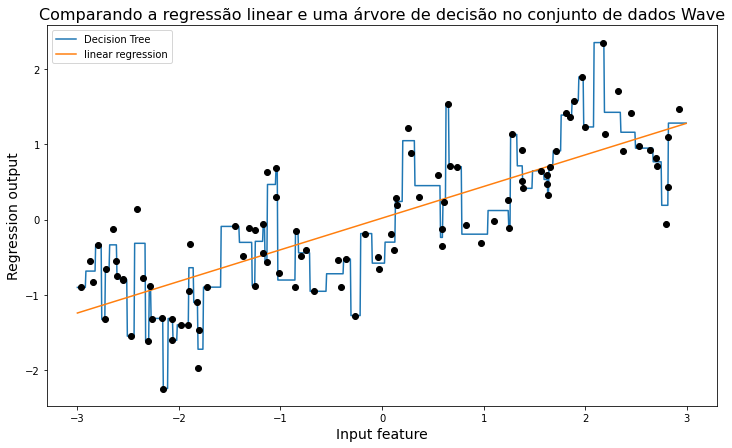

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1,1)

plt.figure(figsize = (12,7))

reg = DecisionTreeRegressor(min_samples_split = 3)
reg.fit(X, y)
plt.plot(line, reg.predict(line), label = 'Decision Tree')

reg = LinearRegression()
reg.fit(X, y)
plt.plot(line, reg.predict(line), label = 'linear regression')

plt.plot(X[:, 0], y, 'o', c = 'k' )
plt.title('Comparando a regressão linear e uma árvore de decisão no conjunto de dados Wave', fontsize = 16)
plt.ylabel('Regression output', fontsize = 14)
plt.xlabel('Input feature', fontsize = 14)
plt.legend(loc = 'best');

Vamos imaginar uma partição do intervalo de entrada para o recurso (neste caso, os números de –3 a 3) em um número fixo de compartimentos – digamos, 10. Um ponto de dados será então representado por qual compartimento ele se enquadra. Para determinar isso, primeiro temos que definir os compartimentos. Nesse caso, definiremos 10 compartimentos igualmente espaçados entre –3 e 3. Usamos a função np.linspace para isso, criando 11 entradas, que criarão 10 compartimentos — são os espaços entre dois limites consecutivos:

In [17]:
bins = np.linspace(-3, 3, 11)
print(f"bins: {bins}")

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Aqui, o primeiro compartimento contém todos os pontos de dados com valores de recurso –3 a –2,68, o segundo compartimento contém todos os pontos com valores de recurso de –2,68 a –2,37 e assim por diante.

Em seguida, registramos para cada ponto de dados em qual compartimento ele se encaixa. Isso pode ser facilmente calculado usando a função np.digitize:

In [18]:
which_bin = np.digitize(X, bins=bins)
print(f"\nData points:\n {X[:5].round(3)}")
print(f"\nBin membership for data points:\n {which_bin[:5].round(3)}")


Data points:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


O que fizemos aqui foi transformar o único recurso de entrada contínua no conjunto de dados de onda em um recurso categórico que codifica em qual compartimento um ponto de dados está. Para usar um modelo scikitlearn nesses dados, transformamos esse recurso discreto em uma codificação one-hot usando o `OneHotEncoder` do módulo de pré-processamento. O OneHotEncoder faz a mesma codificação que pandas.get_dummies, embora atualmente funcione apenas em variáveis categóricas que são números inteiros:

In [19]:
from sklearn.preprocessing import OneHotEncoder
# transforma usando o OneHotEncoder
encoder = OneHotEncoder(sparse = False)
# encoder.fit encontra os valores exclusivos que aparecem em which_bin
encoder.fit(which_bin)
# transform cria a codificação one-hot
X_binned = encoder.transform(which_bin)
X_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

Como especificamos 10 compartimentos, o conjunto de dados transformado X_binned agora é composto de 10 recursos:

In [20]:
print(f"X_binned.shape: {X_binned.shape}")

X_binned.shape: (100, 10)


Agora construímos um novo modelo de regressão linear e um novo modelo de árvore de decisão nos dados one-hot-encoded. O resultado é visualizado na Figura abaixo, junto com os limites do compartimento, mostrados como linhas pretas pontilhadas:

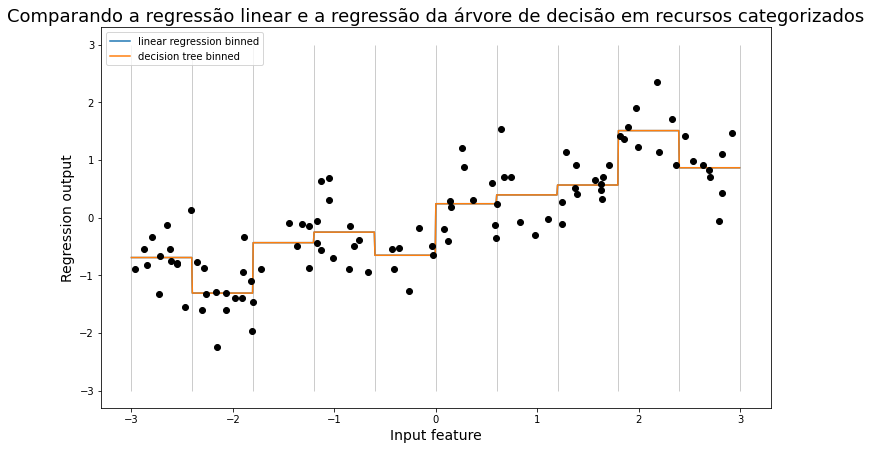

In [21]:
line_binned = encoder.transform(np.digitize(line, bins = bins))

plt.figure(figsize = (12, 7))

reg = LinearRegression()
reg.fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = 'linear regression binned')

reg = DecisionTreeRegressor(min_samples_split = 3)
reg.fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = 'decision tree binned')

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.vlines(bins, -3, 3, linewidth = 1, alpha = 0.2)
plt.title('Comparando a regressão linear e a regressão da árvore de decisão em recursos categorizados', fontsize = 18)
plt.ylabel('Regression output', fontsize = 14)
plt.xlabel('Input feature', fontsize = 14)
plt.legend(loc = 'upper left');

A linha tracejada e a linha sólida estão exatamente uma em cima da outra, o que significa que o modelo de regressão linear e a árvore de decisão fazem exatamente as mesmas previsões. Para cada bin, eles preveem um valor constante. Como os recursos são constantes em cada bin, qualquer modelo deve prever o mesmo valor para todos os pontos dentro de um bin. Comparando o que o
modelos aprendidos antes de categorizar os recursos e depois, vemos que o modelo linear ficou muito mais flexível, pois agora tem um valor diferente para cada bin, enquanto o modelo de árvore de decisão ficou muito menos flexível. Os recursos de categorização geralmente não têm efeito benéfico para modelos baseados em árvore, pois esses modelos podem aprender a dividir os dados em qualquer lugar. De certa forma, isso significa que as árvores de decisão podem aprender qualquer binning que seja mais útil para prever esses dados. Além disso, as árvores de decisão analisam vários recursos de uma só vez, enquanto o binning geralmente é feito por recurso. No entanto, o modelo linear
se beneficiaram muito em expressividade com a transformação dos dados.

Se houver boas razões para usar um modelo linear para um determinado conjunto de dados - digamos, porque ele é muito grande e de alta dimensão, mas alguns recursos têm relações não lineares com a saída - o binning pode ser uma ótima maneira de aumentar o poder da modelagem.

#**Interações e Polinômios**

Outra maneira de enriquecer uma representação de recursos, particularmente para modelos lineares, é adicionar recursos de interação e recursos polinomiais dos dados originais. Esse tipo de engenharia de recursos é frequentemente usado em modelagem estatística, mas também é comum em muitas aplicações práticas de aprendizado de máquina.

Como primeiro exemplo, observe novamente o gráfico: "*Comparando a regressão linear e a regressão da árvore de decisão em recursos categorizados*". O modelo linear aprendeu um valor constante para cada bin no conjunto de dados wave. Sabemos, no entanto, que os modelos lineares podem aprender não apenas deslocamentos, mas também inclinações. Uma maneira de adicionar uma inclinação ao modelo linear nos dados agrupados é adicionar o recurso original (o eixo x no gráfico) de volta. Isso leva a um conjunto de dados dimensional, como visto no próximo gráfico:

In [22]:
X_combined = np.hstack([X, X_binned])
X_combined.shape

(100, 11)

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

In [24]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)

KBinsDiscretizer(n_bins=10, strategy='uniform')

In [25]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

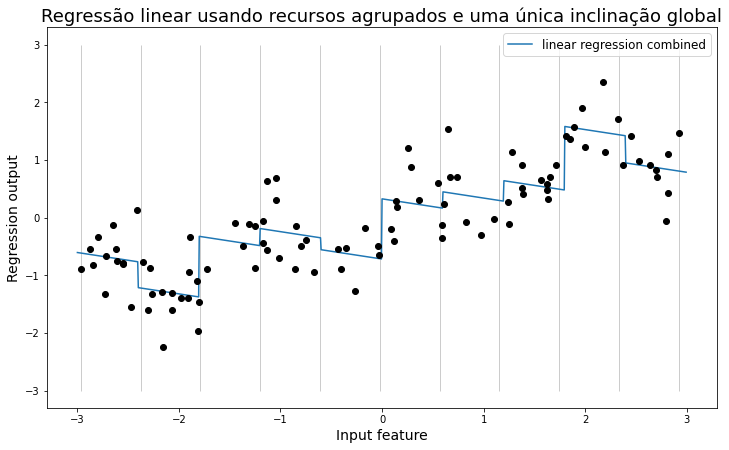

In [26]:
reg = LinearRegression().fit(X_combined, y)

plt.figure(figsize = (12, 7))

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = 'linear regression combined')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.title('Regressão linear usando recursos agrupados e uma única inclinação global', fontsize = 18)
plt.ylabel('Regression output', fontsize = 14)
plt.xlabel('Input feature', fontsize = 14)
plt.legend(loc = 'best', fontsize = 12);

Neste exemplo, o modelo aprendeu um deslocamento para cada caixa, juntamente com uma inclinação. A inclinação aprendida é descendente e compartilhada por todos os compartimentos - há um único recurso de eixo x, que possui uma única inclinação. Como a inclinação é compartilhada em todas as caixas, não parece ser muito útil. Preferimos ter uma inclinação separada para cada caixa! Nós podemos conseguir isso, adicione um recurso de interação ou produto que indique em qual compartimento um ponto de dados está e onde ele se encontra no eixo x. Esse recurso é um produto do indicador de compartimento e do recurso original. Vamos criar este conjunto de dados:

In [27]:
X_product = np.hstack([X_binned, X * X_binned])
X_product.shape

(100, 20)

O conjunto de dados agora tem 20 recursos: os indicadores para qual compartimento um ponto de dados está e um produto do recurso original e o indicador de compartimento. Você pode pensar no recurso do produto como uma cópia separada do recurso do eixo x para cada compartimento. É o recurso original dentro da caixa e zero em qualquer outro lugar. A Figura 4-4 mostra o resultado do modelo linear nesta nova representação:

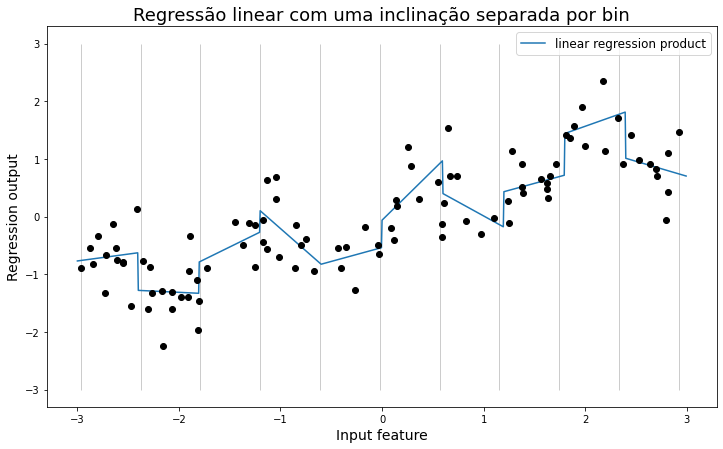

In [28]:
reg = LinearRegression().fit(X_product, y)

plt.figure(figsize = (12, 7))


line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.plot(X[:, 0], y, 'o', c='k')

plt.title('Regressão linear com uma inclinação separada por bin', fontsize = 18)
plt.ylabel('Regression output', fontsize = 14)
plt.xlabel('Input feature', fontsize = 14)
plt.legend(loc = 'best', fontsize = 12);

Como você pode ver, agora cada bin tem seu próprio deslocamento e inclinação neste modelo.

Usar binning é uma maneira de expandir um recurso contínuo. Outra é usar polinômios das características originais. Para um determinado recurso x, podemos considerar x ** 2, x ** 3, x ** 4 e assim por diante. Isso é implementado em PolynomialFeatures no módulo preprocessing:

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# inclui polinômios até x ** 10:
# o padrão "include_bias =True" adiciona um recurso que é constantemente 
poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

Usar um grau de 10 produz 10 recursos:

In [30]:
print(f"X_poly.shape: {X_poly.shape}")

X_poly.shape: (100, 10)


Vamos comparar as entradas de X_poly com as de X:

In [31]:
print(f"Entries of X:\n{X[:5].round(3)}")
print(f"Entries of X_poly:\n{np.round(X_poly[:5], 2)}")

Entries of X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Entries of X_poly:
[[-7.500000e-01  5.700000e-01 -4.300000e-01  3.200000e-01 -2.400000e-01
   1.800000e-01 -1.400000e-01  1.000000e-01 -8.000000e-02  6.000000e-02]
 [ 2.700000e+00  7.310000e+00  1.978000e+01  5.348000e+01  1.446300e+02
   3.911200e+02  1.057710e+03  2.860360e+03  7.735230e+03  2.091828e+04]
 [ 1.390000e+00  1.940000e+00  2.700000e+00  3.750000e+00  5.230000e+00
   7.270000e+00  1.013000e+01  1.409000e+01  1.962000e+01  2.731000e+01]
 [ 5.900000e-01  3.500000e-01  2.100000e-01  1.200000e-01  7.000000e-02
   4.000000e-02  3.000000e-02  2.000000e-02  1.000000e-02  1.000000e-02]
 [-2.060000e+00  4.260000e+00 -8.790000e+00  1.814000e+01 -3.745000e+01
   7.729000e+01 -1.595200e+02  3.292200e+02 -6.794800e+02  1.402370e+03]]


Você pode obter a semântica dos recursos chamando o método get_feature_names, que fornece o expoente para cada recurso:

In [32]:
print(f"Polynomial feature names:\n{poly.get_feature_names()}")

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


Você pode ver que a primeira coluna de X_poly corresponde exatamente a X, enquanto as outras colunas são as potências da primeira entrada. É interessante ver o quão grande alguns dos valores podem chegar. A segunda coluna tem entradas acima de 20.000, ordens de grandeza diferentes do resto.

O uso de recursos polinomiais junto com um modelo de regressão linear produz o modelo clássico de regressão polinomial (consulte o gráfico abaixo):

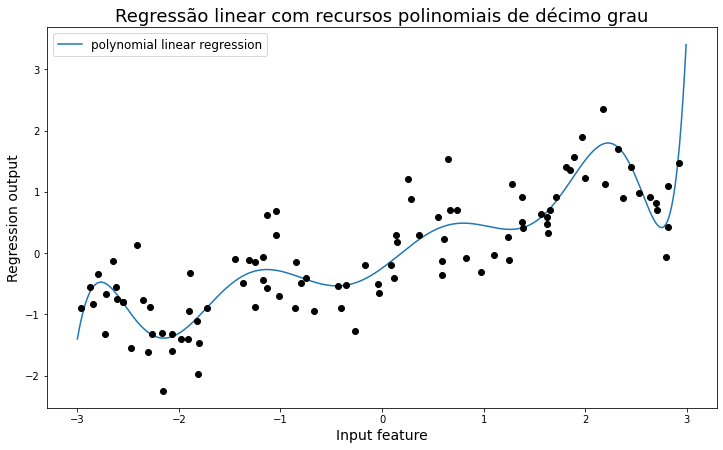

In [33]:
reg = LinearRegression()
reg.fit(X_poly, y)

line_poly = poly.transform(line)

plt.figure(figsize = (12, 7))
plt.plot(line, reg.predict(line_poly), label = 'polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.title('Regressão linear com recursos polinomiais de décimo grau', fontsize = 18)
plt.ylabel('Regression output', fontsize = 14)
plt.xlabel('Input feature', fontsize = 14)
plt.legend(loc = 'best', fontsize = 12)
plt.show();

Como você pode ver, os recursos polinomiais produzem um ajuste muito suave nesses dados unidimensionais. No entanto, polinômios de alto grau tendem a se comportar de maneira extrema nas fronteiras ou em regiões com poucos dados.

Como comparação, aqui está um modelo SVM do kernel aprendido nos dados originais, sem nenhuma transformação:

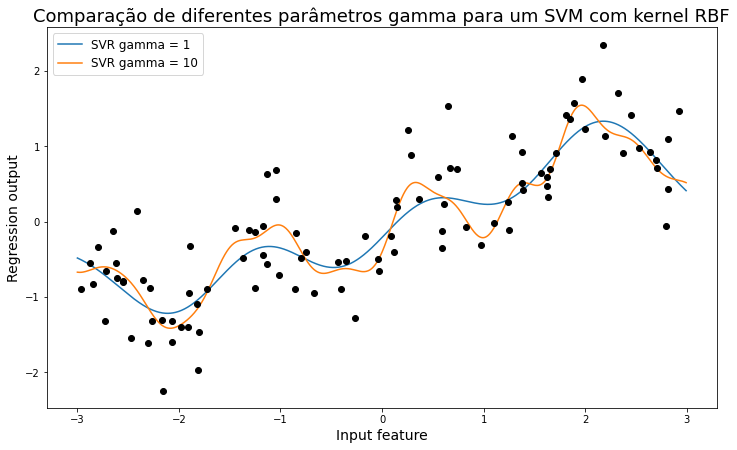

In [37]:
from sklearn.svm import SVR

plt.figure(figsize = (12, 7))

for gamma in [1, 10]:
  svr = SVR(gamma = gamma).fit(X, y)
  plt.plot(line, svr.predict(line), label = 'SVR gamma = {}'.format(gamma))



plt.plot(X[:, 0], y, 'o', c = 'k')
plt.title('Comparação de diferentes parâmetros gamma para um SVM com kernel RBF', fontsize = 18)
plt.ylabel('Regression output', fontsize = 14)
plt.xlabel('Input feature', fontsize = 14)
plt.legend(loc = 'best', fontsize = 12)
plt.show();

Usando um modelo mais complexo, um SVM de kernel, podemos aprender uma previsão similarmente complexa para a regressão polinomial sem uma transformação explícita dos recursos.

Como uma aplicação mais realista de interações e polinômios, vamos olhar novamente para o conjunto de dados da Boston Housing. Já usamos recursos polinomiais neste conjunto de dados no Capítulo 2. Agora vamos dar uma olhada em como esses recursos foram construídos e como os recursos polinomiais ajudam. Primeiro carregamos os dados e os redimensionamos para estarem entre 0 e 1 usando MinMaxScaler:

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [39]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state = 0)

# redimensionar dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Agora, extraímos características polinomiais e interações até um grau de 2:

In [42]:
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print('-' * 35)
print(f"X_train.shape: {X_train.shape}")
print('-' * 35)
print(f"X_train_poly.shape: {X_train_poly.shape}")
print('-' * 35)

-----------------------------------
X_train.shape: (379, 13)
-----------------------------------
X_train_poly.shape: (379, 105)
-----------------------------------


Os dados originalmente tinham 13 recursos, que foram expandidos em 105 recursos de interação. Esses novos recursos representam todas as interações possíveis entre dois recursos originais diferentes, bem como o quadrado de cada recurso original. Deggre = 2 aqui significa que examinamos todos os recursos que são o produto de até dois recursos originais. A correspondência exata entre os recursos de entrada e saída pode ser encontrada usando o método `get_feature_names`:

In [43]:
print(f"Polynomial feature names:\n{poly.get_feature_names()}")

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


O primeiro novo recurso é um recurso constante, chamado de "1". Os próximos 13 recursos são os recursos originais (chamados de "x0" a "x12"). Em seguida, segue o primeiro recurso ao quadrado ("x0^2") e combinações do primeiro e dos outros recursos.

Vamos comparar o desempenho usando o Ridge nos dados com e sem interações:

In [47]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

ridge_ = Ridge()
ridge_.fit(X_train_poly, y_train)

print('-' * 45)
print(f"Score without interactions: {ridge.score(X_test_scaled, y_test):.2%}")
print('-' * 45)
print(f"Score with interations: {ridge_.score(X_test_poly, y_test):.2%}")
print('-' * 45)

---------------------------------------------
Score without interactions: 57.69%
---------------------------------------------
Score with interations: 74.11%
---------------------------------------------


Claramente, as interações e os recursos polinomiais nos deram um bom impulso no desempenho ao usar o Ridge. Ao usar um modelo mais complexo como uma floresta aleatória, a história é um pouco diferente:

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_scaled, y_train)

rf_ = RandomForestRegressor(n_estimators = 100)
rf_.fit(X_train_poly, y_train)

print('-' * 45)
print(f"Score without interactions: {rf.score(X_test_scaled, y_test):.2%}")
print('-' * 45)
print(f"Score with interactions: {rf_.score(X_test_poly, y_test):.2%}")
print('-' * 45)

---------------------------------------------
Score without interactions: 77.76%
---------------------------------------------
Score with interactions: 75.09%
---------------------------------------------


Você pode ver que mesmo sem recursos adicionais, a floresta aleatória supera o desempenho do Ridge. Adicionar interações e polinômios na verdade diminui um pouco o desempenho.